First, let's download a sample image. I'll use a public domain image from Wikimedia Commons.

In [3]:
import requests
import os

image_url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/butterfly.jpg'
img_path = 'sample_image.jpg'

# Download the image
response = requests.get(image_url)
if response.status_code == 200:
    with open(img_path, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded sample image to {img_path}")
else:
    print(f"Failed to download image from {image_url}. Status code: {response.status_code}")
    img_path = None # Indicate failure

Downloaded sample image to sample_image.jpg


Now, I'll use the downloaded sample image with your provided code to generate the Gaussian pyramid levels and Canny edges. I've slightly adjusted your original code to directly use the downloaded `img_path` instead of `files.upload()` for this demonstration.

Using image: sample_image.jpg


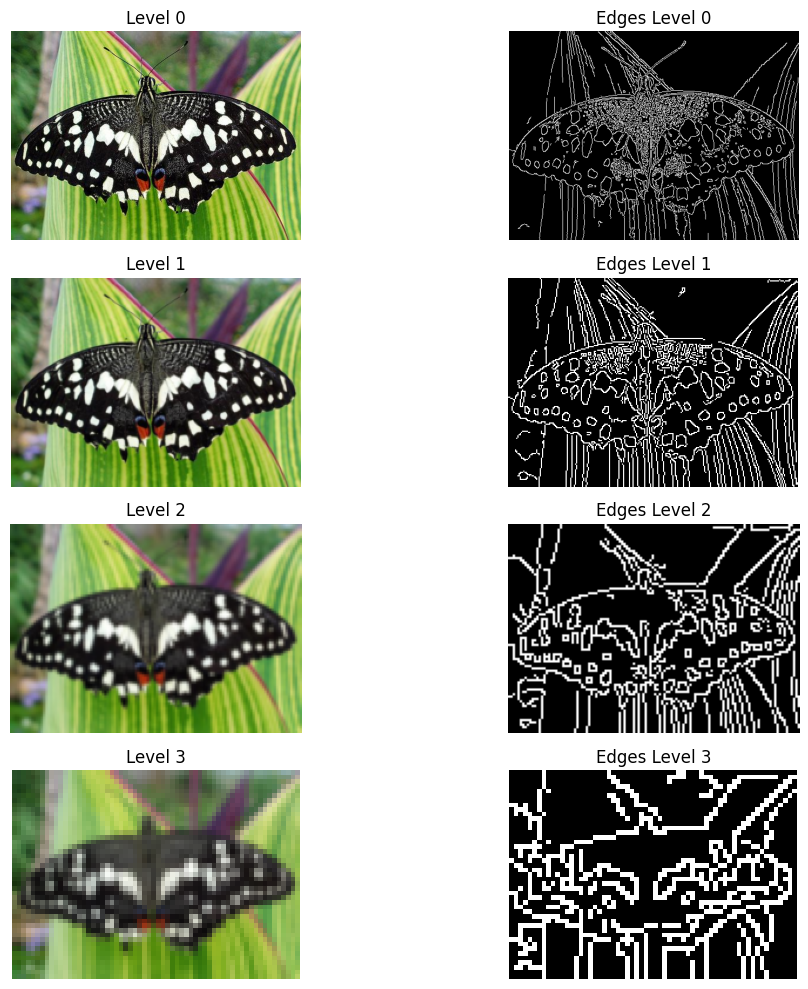

In [4]:
import cv2
import matplotlib.pyplot as plt
import os

# Ensure img_path was successfully set from the previous cell
if 'img_path' not in locals() or img_path is None:
    print("Error: No image path found. Please ensure the sample image was downloaded successfully.")
else:
    print("Using image:", img_path)
    img = cv2.imread(img_path)
    if img is None:
        print("Image not loaded. Please check the path and file integrity.")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        level0 = img
        level1 = cv2.pyrDown(level0)
        level2 = cv2.pyrDown(level1)
        level3 = cv2.pyrDown(level2)
        levels = [level0, level1, level2, level3]
        edges = []
        for lvl in levels:
            gray = cv2.cvtColor(lvl, cv2.COLOR_RGB2GRAY)
            edge = cv2.Canny(gray, 100, 200)
            edges.append(edge)
        plt.figure(figsize=(12,10))
        for i in range(4):
            plt.subplot(4,2,2*i+1)
            plt.imshow(levels[i])
            plt.title(f"Level {i}")
            plt.axis("off")
            plt.subplot(4,2,2*i+2)
            plt.imshow(edges[i], cmap='gray')
            plt.title(f"Edges Level {i}")
            plt.axis("off")
        plt.tight_layout()
        plt.show()
